In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.montecarlo import MC_european_call_price
from src.pricing_formulas import european_call_price

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [62]:
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": np.linspace(1, 20, 20)}

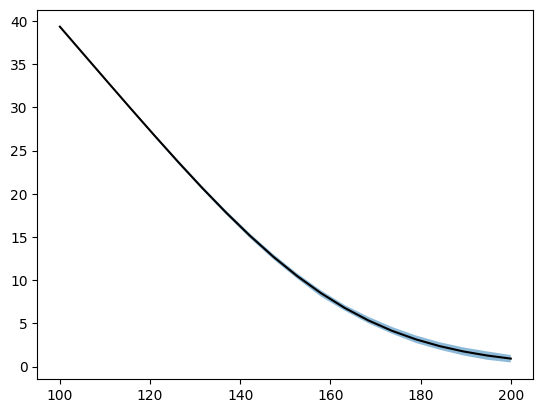

Mean std:  0.13829454639315222


In [93]:
N_points = 20
K = np.linspace(100, 200, N_points)
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": 10}
N_SAMPLES = (100, 100, N_points)
MC_prices = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=True, antithetic=False
)
std = np.std(MC_prices, axis=0)
means = np.mean(MC_prices, axis=0)
real_prices = european_call_price(PARAMS, K)
plt.plot(K, real_prices, "k-")
plt.fill_between(K, means - 2 * std, means + 2 * std, alpha=0.5)
plt.show()
print("Mean std: ", np.mean(std))

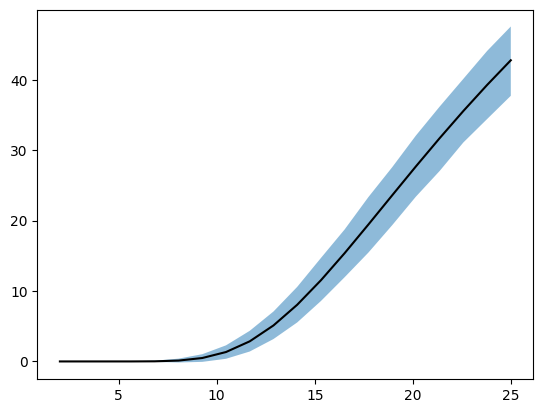

In [64]:
N_points = 20
T = np.linspace(2, 25, N_points)
K = 200
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": T}
N_SAMPLES = (100, 1000, N_points)
MC_prices = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=False, antithetic=False
)
std = np.std(MC_prices, axis=0)
means = np.mean(MC_prices, axis=0)
real_prices = european_call_price(PARAMS, K)
plt.plot(T, real_prices, "k-")
plt.fill_between(T, means - 2 * std, means + 2 * std, alpha=0.5)
plt.show()

In [89]:
K = 100
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": 10}
N_SAMPLES = (100, 100)
MC_prices = MC_european_call_price(
    N_SAMPLES, PARAMS, K=K, moment_matching=True, antithetic=False
)
std = np.std(MC_prices, axis=0)
mean = np.mean(MC_prices, axis=0)
print("Mean: ", mean, "\n Std:", std)

Mean:  39.34677137538957 
 Std: 0.014409205140774357


In [5]:
from src.montecarlo import MC_barrier_call_price
from src.pricing_formulas import barrier_call_price

In [38]:
K = 200
H = 1
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": 10}
N_SAMPLES = (1000, 100, 100)
MC_prices = MC_barrier_call_price(
    N_SAMPLES, PARAMS, H=H, K=K, moment_matching=True, antithetic=True
)
std = np.std(MC_prices, axis=0)
mean = np.mean(MC_prices, axis=0)
print("Mean: ", mean, "\n Std:", std)

Mean:  0.9403612718330099 
 Std: 0.07421691695619272


np.float64(39.34954892023525)

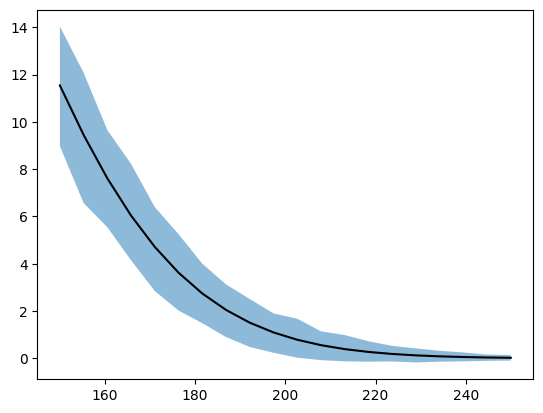

Mean std:  0.517607762866555


In [68]:
N_points = 20
K = np.linspace(150, 250, N_points)
H = 90
PARAMS = {"S0": 100, "r": 0.05, "sigma": 0.05, "T": 10}
N_SAMPLES = (100, 1, 100, N_points)
MC_prices = MC_barrier_call_price(
    N_SAMPLES, PARAMS, K=K, H=H, moment_matching=False,
    antithetic=False
)
std = np.std(MC_prices, axis=0)
means = np.mean(MC_prices, axis=0)
real_prices = barrier_call_price(PARAMS, K=K, H=H)
plt.plot(K, real_prices, "k-")
plt.fill_between(K, means - 2 * std, means + 2 * std, alpha=0.5)
plt.show()
print("Mean std: ", np.mean(std))

In [14]:
a = np.random.normal(size=(3, 4, 5))

In [204]:
np.mean(a, axis=0)

array([[ 0.45029254,  1.13492072,  0.9937862 ,  0.32442618, -0.26759661],
       [ 0.44794143, -0.86871709, -0.19090412,  0.53552112, -0.67499203],
       [ 0.57670932,  0.37624504,  1.04505806,  0.28422497,  0.27935599],
       [-0.1639596 ,  0.60125404, -0.52903724, -0.10930093,  0.01870567]])

In [15]:
a - np.mean(a, axis=0)

array([[[-0.37857961,  0.27897684, -1.19570363,  0.35747734,
         -0.57185428],
        [-0.41934953,  0.6827479 ,  1.32182455, -1.59411203,
          0.28466268],
        [ 0.61236938,  0.64988255,  0.0573528 ,  0.3131266 ,
         -0.64517776],
        [-0.88420085, -0.52006727, -0.15022156, -0.13540689,
         -0.31633435]],

       [[ 0.06096954, -0.17629952,  1.60821515,  0.35108323,
          1.82820678],
        [-1.13472303, -0.20689608, -0.56019283,  0.6310242 ,
          0.64662522],
        [-1.32111287, -1.68354542,  0.73367524, -0.80836941,
          1.66131703],
        [ 1.11351256, -1.11803165, -0.49972104, -0.04851855,
          0.72207473]],

       [[ 0.31761007, -0.10267732, -0.41251152, -0.70856057,
         -1.2563525 ],
        [ 1.55407256, -0.47585181, -0.76163172,  0.96308783,
         -0.9312879 ],
        [ 0.7087435 ,  1.03366288, -0.79102804,  0.49524281,
         -1.01613928],
        [-0.22931171,  1.63809891,  0.6499426 ,  0.18392544,
         -0

In [16]:
np.std(a, axis=0)

array([[0.2874694 , 0.199543  , 1.18127458, 0.50103479, 1.3225958 ],
       [1.13704176, 0.49510458, 0.93828195, 1.13533004, 0.67489608],
       [0.93499605, 1.20071249, 0.62377722, 0.57641849, 1.18445032],
       [0.83152575, 1.18375571, 0.48121826, 0.1348056 , 0.5118869 ]])

In [21]:
x = (a - np.mean(a, axis=1, keepdims=True)) / np.std(a, axis=1, keepdims=True)
np.std(x, axis=1)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
n = (2, 3, 4, 5)
samples = np.ones(n)
zeroes = np.zeros((2, 1, 4, 5))
x = np.concat((zeroes, samples), axis=1)

In [ ]:
2 * 1.22**2

2.9768

In [20]:
x[:, -1].shape

(2, 4, 5)